In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
from prophet import Prophet
from hdfs import InsecureClient
import numpy as np

plt.style.use('fivethirtyeight')
d2coding_path = './D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2coding_path)
plt.rcParams["font.family"] = 'D2coding'

matplotlib.rcParams['axes.unicode_minus'] = False

In [6]:
client_hdfs = InsecureClient('http://bdata.iptime.org:9999', user='hadoop')
path = '/user/hadoop/sports/_20250110104927.csv'
with client_hdfs.read(path, encoding='utf-8') as reader:
    gdata = pd.read_csv(reader)
gdata.columns = ["년도", "대한민국", "중국", "일본", "미국", "브라질", "페루", "핀란드", "프랑스", "독일", "스웨덴", "영국", "남아공", "호주"]
gdata


,년도,대한민국,중국,일본,미국,브라질,페루,핀란드,프랑스,독일,스웨덴,영국,남아공,호주
0,2001,4.7,8.3,0.4,1.0,1.4,0.6,2.6,2.0,1.7,1.4,2.6,2.7,2.0
1,2002,7.7,9.1,0.0,1.7,3.1,5.5,1.7,1.1,-0.2,2.2,1.8,3.7,4.0
2,2003,3.1,10.0,1.5,2.8,1.1,4.2,2.0,0.8,-0.7,2.3,3.1,2.9,3.1
3,2004,5.2,10.1,2.2,3.8,5.8,5.0,4.0,2.8,1.2,4.3,2.4,4.6,4.2
4,2005,4.4,11.4,1.8,3.5,3.2,6.3,2.8,1.7,0.7,2.9,2.7,5.3,3.2
5,2006,5.2,12.7,1.4,2.8,4.0,7.5,4.0,2.4,3.8,4.7,2.4,5.6,2.8
6,2007,5.8,14.2,1.5,2.0,6.1,8.5,5.3,2.4,3.0,3.4,2.6,5.4,3.8
7,2008,3.0,9.7,-1.2,0.1,5.1,9.1,0.8,0.3,1.0,-0.5,-0.2,3.2,3.6
8,2009,0.8,9.4,-5.7,-2.6,-0.1,1.1,-8.1,-2.9,-5.7,-4.3,-4.6,-1.5,1.9
9,2010,7.0,10.6,4.1,2.7,7.5,8.3,3.2,1.9,4.2,6.0,2.2,3.0,2.2


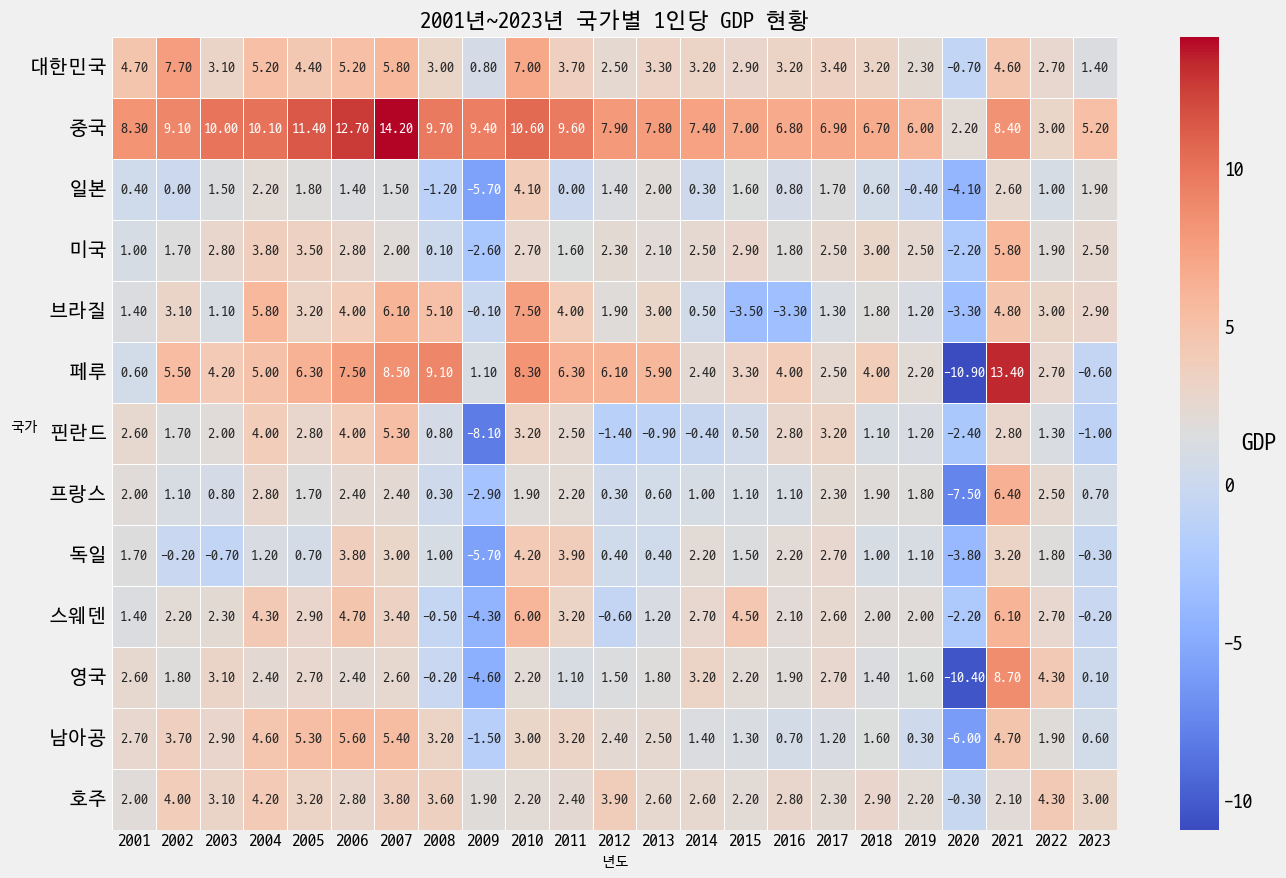

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = gdata.set_index("년도")

# X축을 2001년부터 2023년까지 순서대로 설정 (년도 역순)
heatmap_data = heatmap_data.sort_index(ascending=True)

# 행과 열을 전치하여 X축과 Y축을 바꿈
heatmap_data = heatmap_data.T  # 전치 (열과 행을 바꿈)

# 히트맵 생성
plt.figure(figsize=(14, 9))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar_kws={'label': 'GDP'}, annot_kws={'size': 10})

# 제목과 레이블 설정
plt.title("2001년~2023년 국가별 1인당 GDP 현황", fontsize=16)
plt.xlabel("년도", fontsize=10)
plt.ylabel("국가", fontsize=10, rotation=0)

# X축(국가)을 맞추기 위한 조정 (국가 순으로 표시)
ax.set_xticklabels(heatmap_data.columns, ha='center', fontsize=12)

# Y축 레이블 수평으로 표시 (rotation=0)
plt.yticks(rotation=0)

# 색상 막대 레이블 회전 수정 (회전 0 적용)
cbar = ax.collections[0].colorbar
cbar.set_label('GDP', rotation=0)

# 레이아웃 자동 조정
plt.tight_layout()
plt.show()

In [9]:
kdata = gdata[["년도", "대한민국"]].copy()
kdata

,년도,대한민국
0,2001,4.7
1,2002,7.7
2,2003,3.1
3,2004,5.2
4,2005,4.4
5,2006,5.2
6,2007,5.8
7,2008,3.0
8,2009,0.8
9,2010,7.0


In [10]:
# 필요한 연도만 필터링 (2015년부터 2023년까지)
kdata_filtered = kdata[(kdata["년도"] >= 2015) & (kdata["년도"] <= 2023)]

# 결과 출력
kdata_filtered

,년도,대한민국
14,2015,2.9
15,2016,3.2
16,2017,3.4
17,2018,3.2
18,2019,2.3
19,2020,-0.7
20,2021,4.6
21,2022,2.7
22,2023,1.4


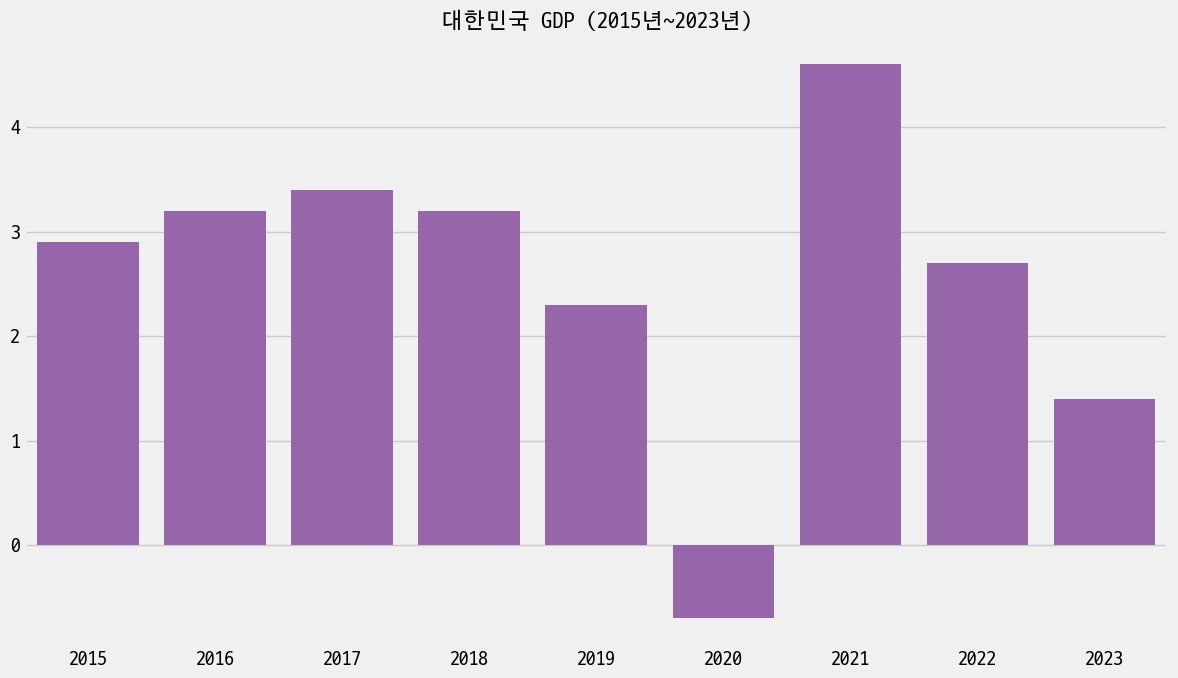

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 막대그래프 생성
plt.figure(figsize=(12, 7))
sns.barplot(x="년도", y="대한민국", data=kdata_filtered, color="#9B59B6")

# x축과 y축 레이블 제거
plt.xlabel("")
plt.ylabel("")

# 제목 설정
plt.title("대한민국 GDP (2015년~2023년)", fontsize=16)

# 레이아웃 자동 조정
plt.tight_layout()
plt.show()

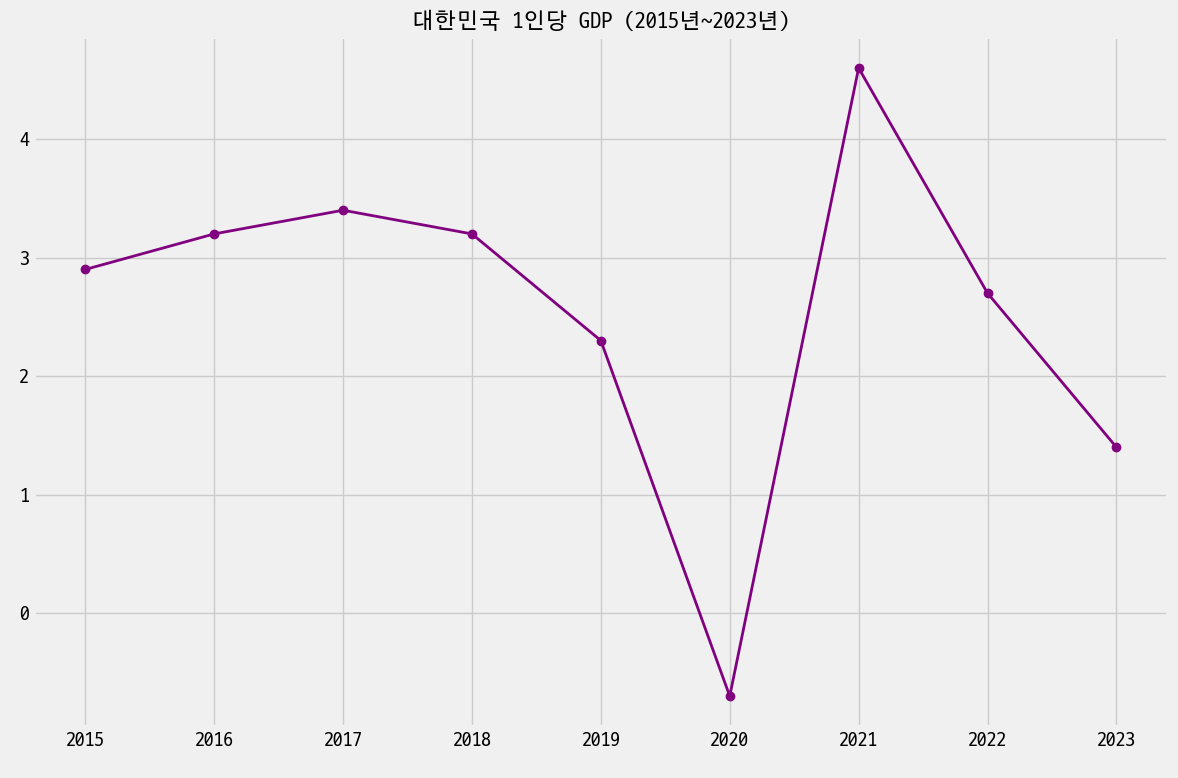

In [35]:
import matplotlib.pyplot as plt

# 라인 차트 생성
plt.figure(figsize=(12, 8))
plt.plot(kdata_filtered["년도"], kdata_filtered["대한민국"], marker='o', color='purple', linewidth=2, markersize=6)

# 제목과 레이블 설정
plt.title("대한민국 1인당 GDP (2015년~2023년)", fontsize=16)
plt.xlabel(" ", fontsize=10)
plt.ylabel(" ", fontsize=10, rotation=0)

# 레이아웃 자동 조정
plt.tight_layout()
plt.show()